In [458]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [459]:
# 데이터 불러오기
df = pd.read_csv('bank_marketing.csv')

# PART I - EDA

In [460]:
# 데이터 구조 살펴보기
display(df) #Initial structure of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [462]:
# 전체 데이터 정보 파악하기
print("1. 원 데이터 크기: ", df.shape)
print("")
print("2. 변수 리스트:")
print(df.columns.values)
print("")
print("3. 데이터 정보 요약 출력:")
print(df.info())
print("")
print("4. 데이터 타입 확인 출력:")
print(df.dtypes)
print("")
print("5. null 데이터 여부 확인 출력:")
print(df.isnull().sum())
print("")


1. 원 데이터 크기:  (45211, 17)

2. 변수 리스트:
['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']

3. 데이터 정보 요약 출력:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   4

    위의 분석을 통해 
    1. 원 데이터 크기는 (45211, 17) 임을 알 수 있다.
    
    2. 변수는 입력 변수 16 종류 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']에 출력 변수 1종류 ['y'] 로 이루어져 있음을 알 수 있다.
    
    3. 데이터 정보 요약 및 데이터 타입을 통해 numerical data는 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous' 7종류이고, categorical data는 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome' 9종류이다. 참고로 출력 변수 'y'도 categorical data이다. 
    
    4. null 데이터는 없다. 

In [463]:
# Select a numeric and category column name of dataset
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns
print(numeric_col)
print(category_col)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


    numerical data와 category_col를 분리해서 분석하도록 한다.

PART I-1. numerical data 분석 

In [464]:
# numerical data의 statistical summary 확인
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


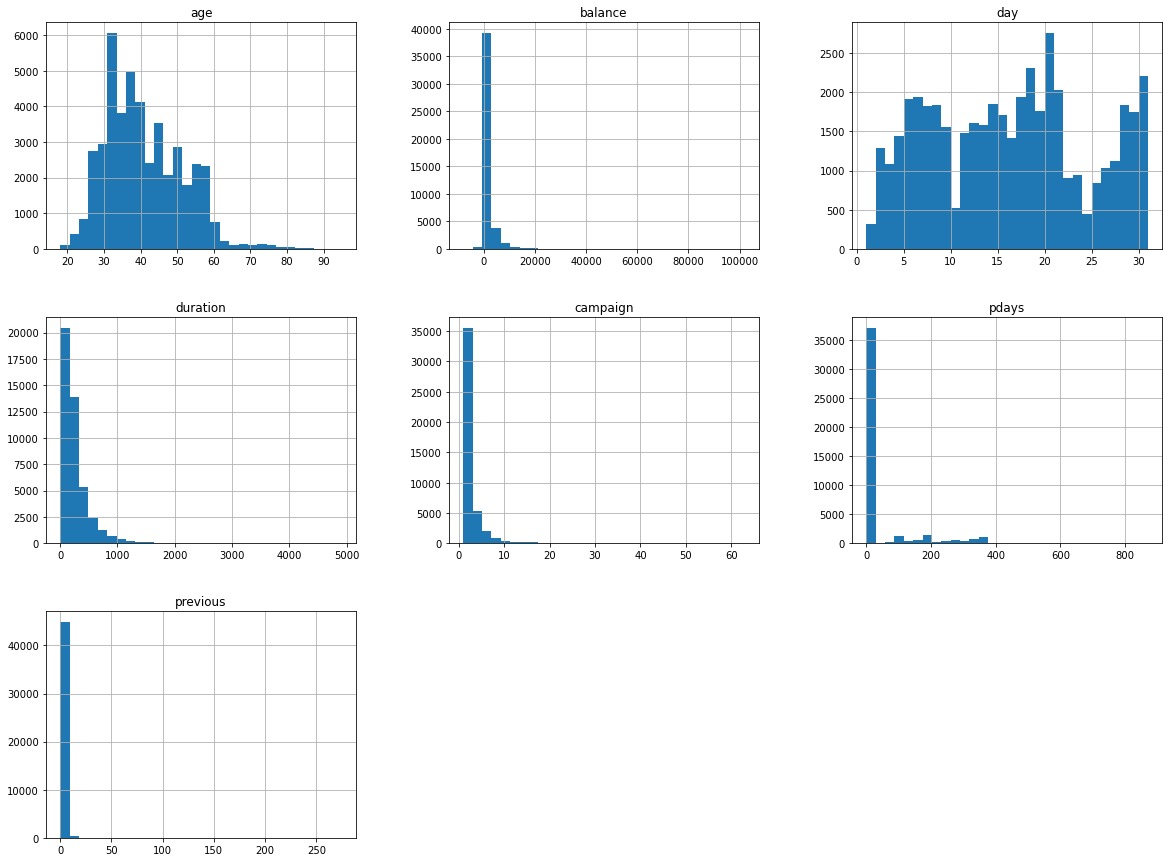

In [172]:
# 히스토그램으로 표현한 numerical data의 visualize distribution
%matplotlib inline
df[numeric_col].hist(bins=30, figsize=(20,15))
plt.show()

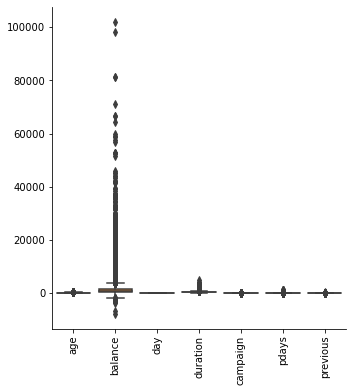

In [173]:
# 박스플랏으로 표현한 numerical data의 visualization
sns.catplot(data=df,kind='box')
plt.xticks(rotation=90)
plt.show()
# balance 값이 현저하게 높음을 알 수 있다. 향후 preprocessing 과정에서 정규화 필요

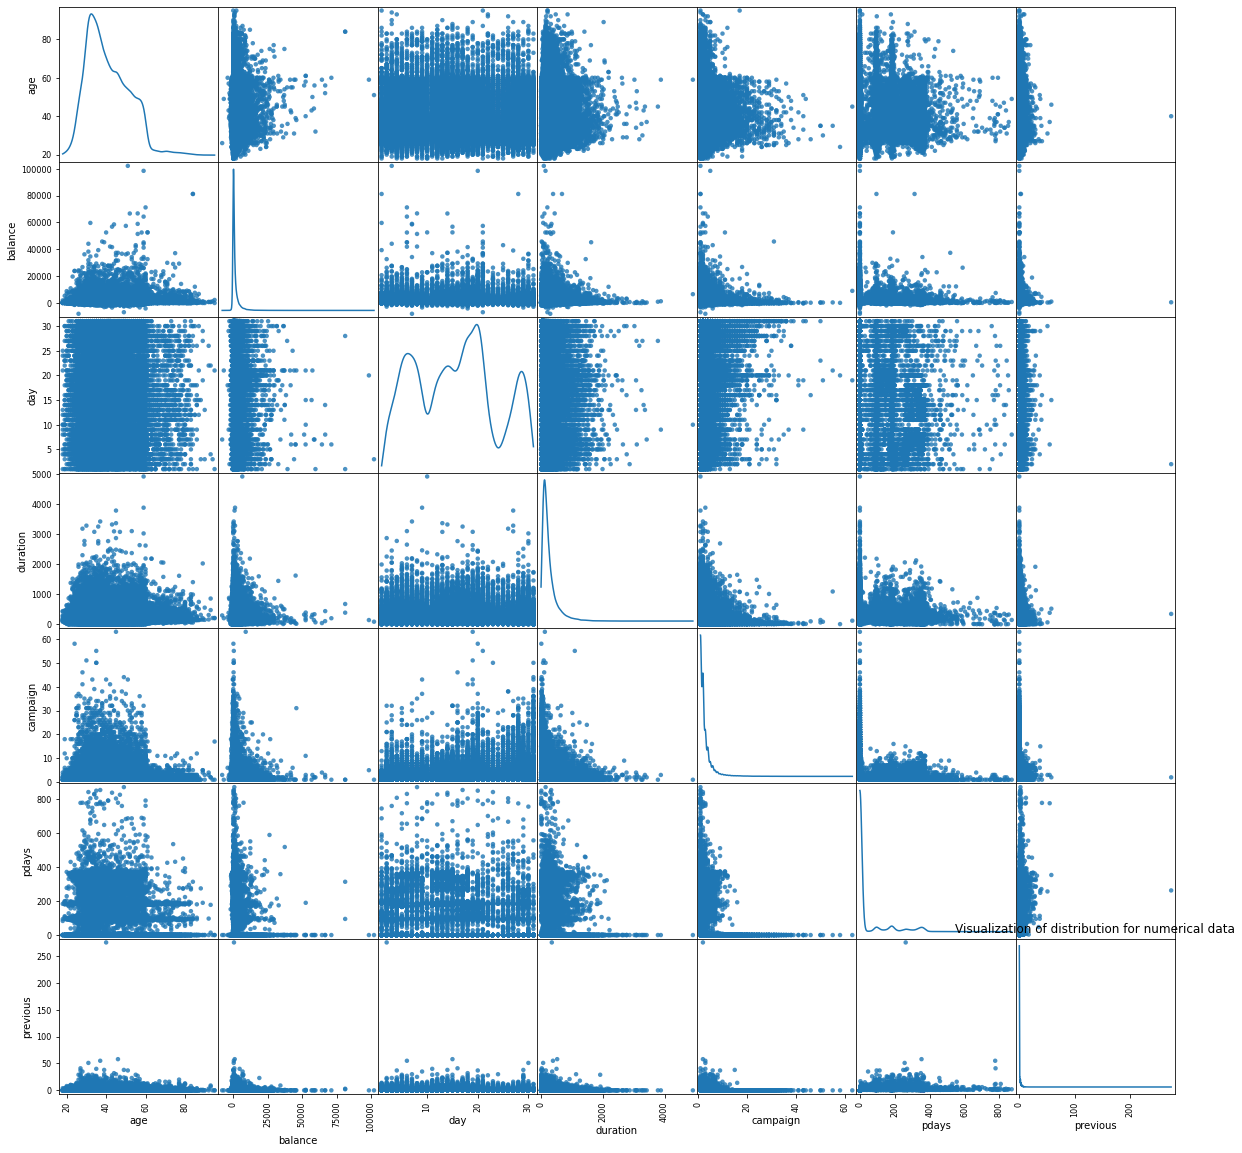

In [174]:
# numerical data의 distribution을 시각화
grr = pd.plotting.scatter_matrix(df, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, diagonal='kde')
plt.title('Visualization of distribution for numerical data')
plt.show()

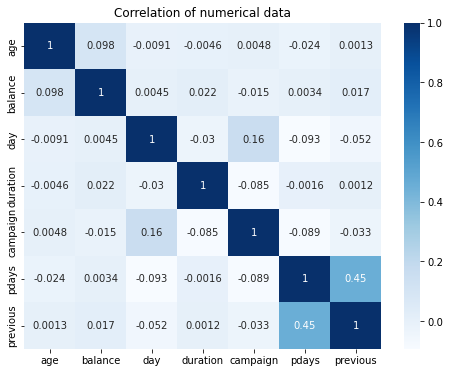

In [127]:
# 각 numerical data의 상관성을 확인해보기 위해 heatmap을 그려보면 다음과 같다.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='Blues')
plt.title('Correlation of numerical data')
plt.show()
# pdays와 previous 는 연관성이 꽤 높고 그 다음은 day 와 campaign, 그리고 age와 balance 순으로 연관성이 있음을 알 수 있다.

PART I-2. categorical data 분석 

In [128]:
# 각 categorical data의 value의 갯수 파악
for col in category_col:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


In [129]:
# categorical data의 각 명과 각 데이터셋에 있는 데이터 명 및 갯수 파악
for col in category_col:
    print({col})
    print('-'*30)
    print(df[col].value_counts(), "\n")
    print('')

{'job'}
------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 


{'marital'}
------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 


{'education'}
------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 


{'default'}
------------------------------
no     44396
yes      815
Name: default, dtype: int64 


{'housing'}
------------------------------
yes    25130
no     20081
Name: housing, dtype: int64 


{'loan'}
------------------------------
no     37967
yes     7244
Name: loan, dtype: int64 


{'contact'}
------------------------------
cellular     29285
unknown      13020
telephone    

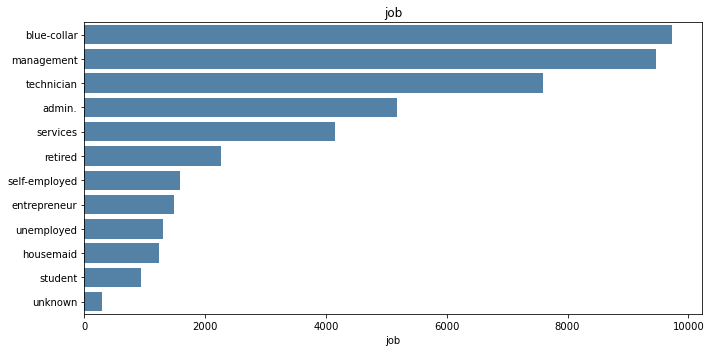

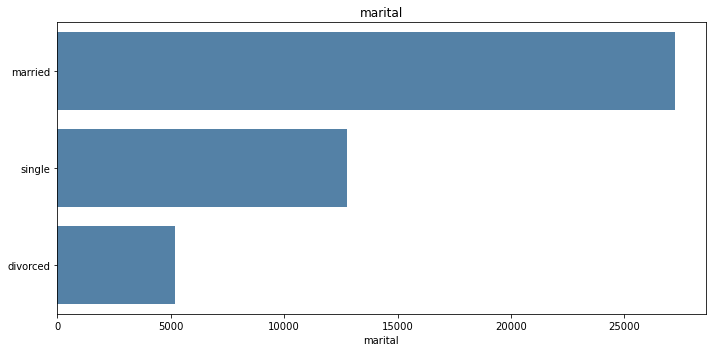

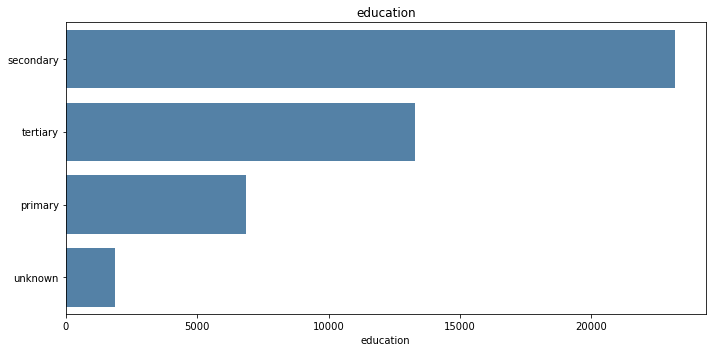

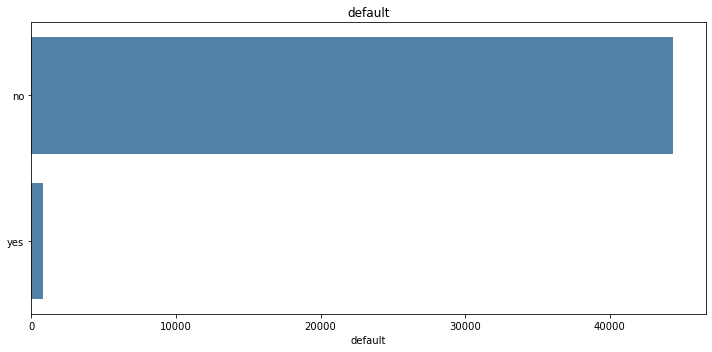

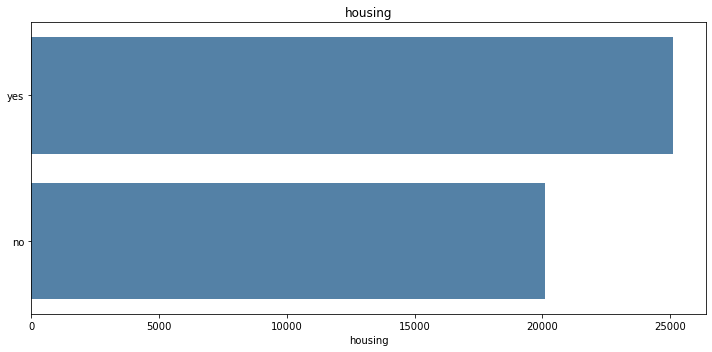

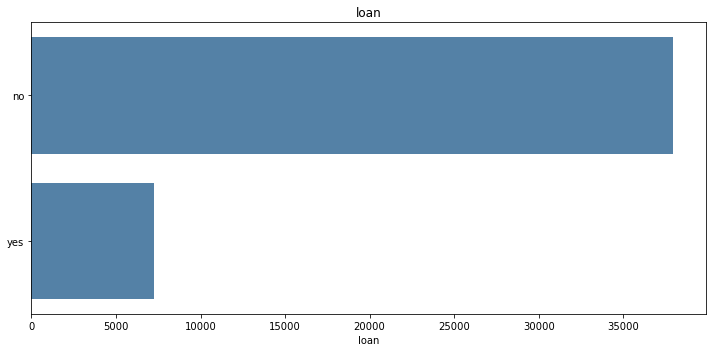

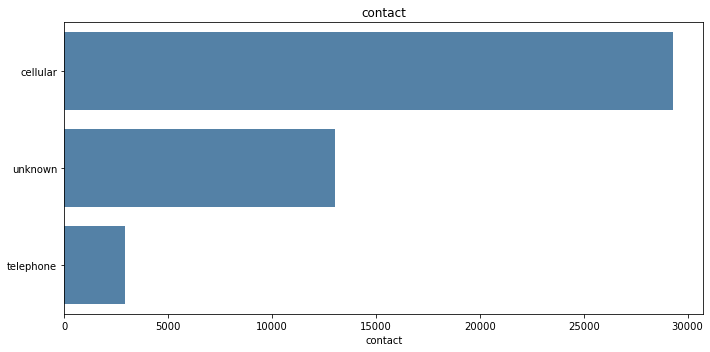

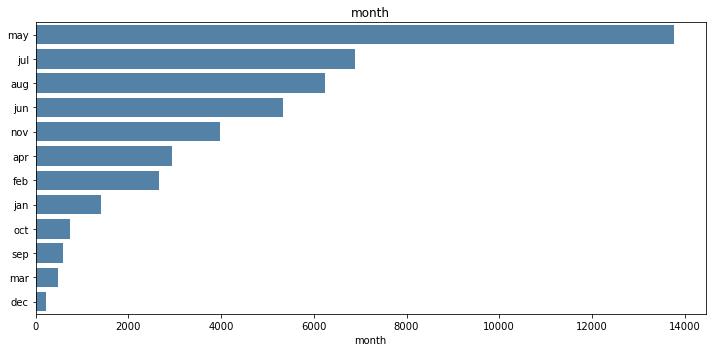

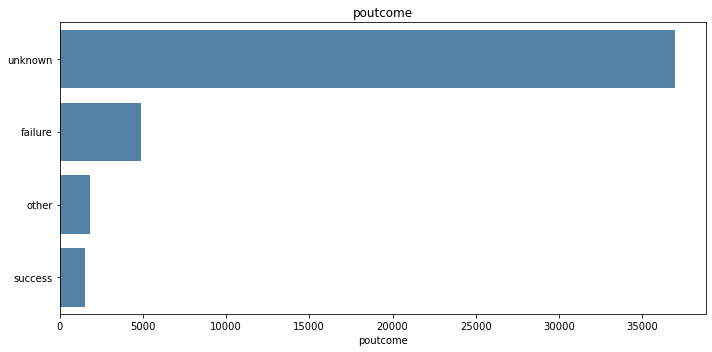

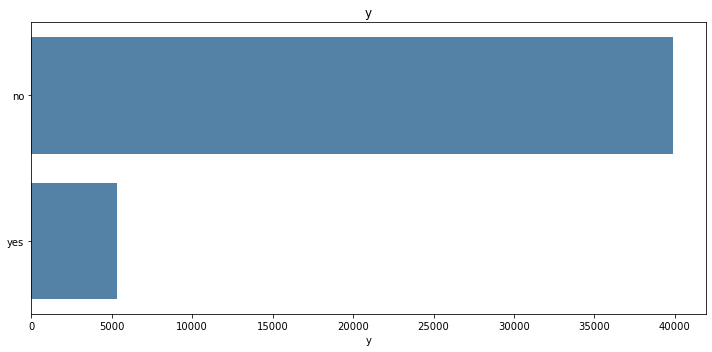

In [130]:
# categorical data의 visualize a count values 
for col in category_col:
    plt.figure(figsize=(10,5))    
    sns.barplot(x=df[col].value_counts(), y=df[col].value_counts().index, data=df, color='steelblue')    
    plt.title(col)    
    plt.tight_layout()

PART I-3. y에 따른 numerical data 및 categorical data 분석

    PART I-3-1. 출력변수 y의 특징

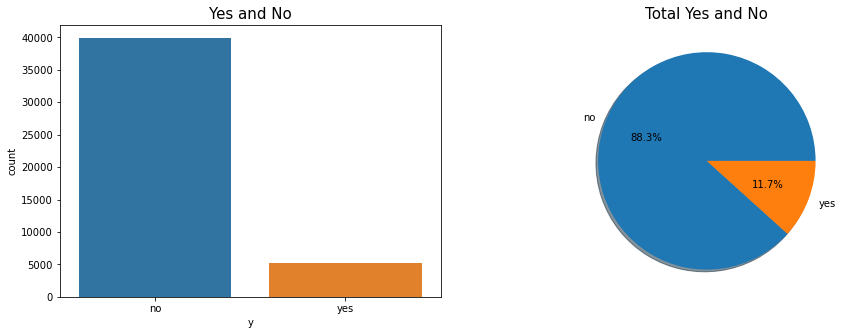

In [131]:
# 출력 변수 y의 특징
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=df)
plt.title('Yes and No',size = 15)
plt.subplot(1,2,2)
labels =df['y'].value_counts(sort = True).index
sizes = df['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Total Yes and No',size = 15)
plt.show()
# 적금 가입률이 11.7 % 정도 밖에 되지 않는 high imbalance data 임을 알 수 있다.

    PART I-3-2. 출력변수 y에 대한 입력 수치 데이터들의 다양한 특징

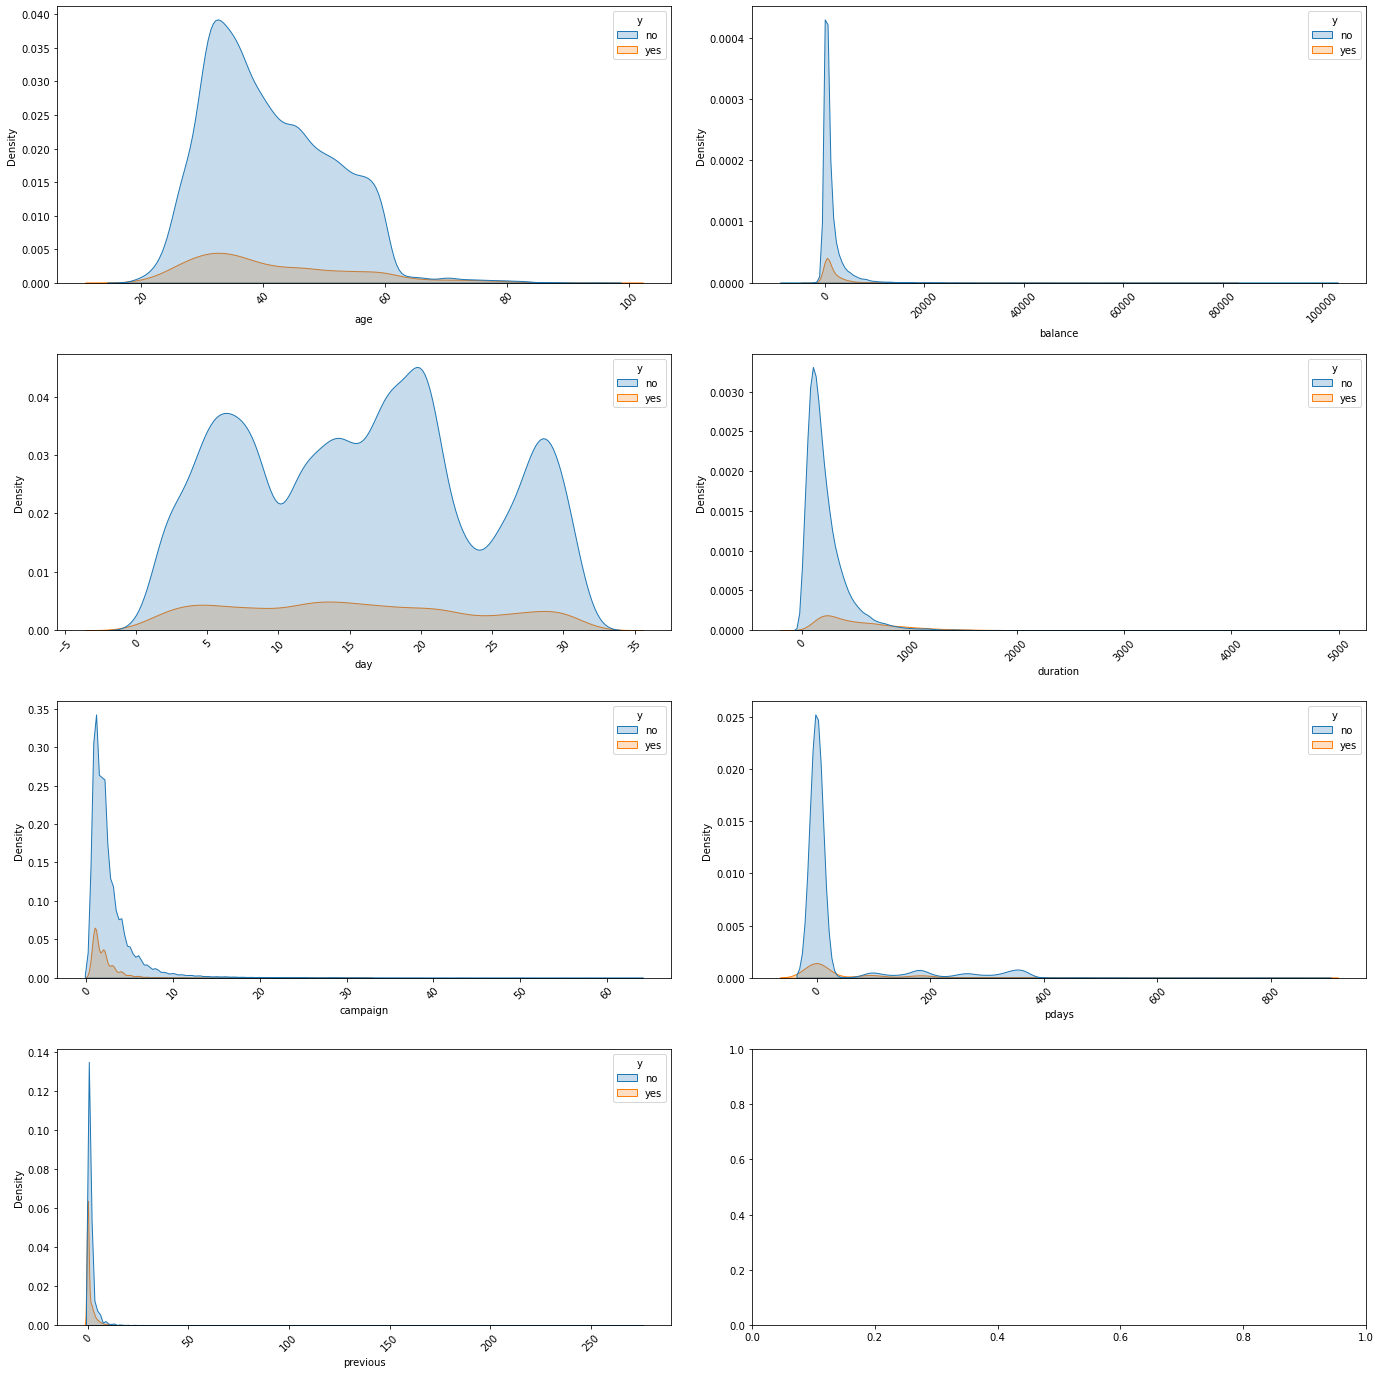

In [132]:
# numerical data for 'y'
fig, axes = plt.subplots(4,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(numeric_col, axes.flatten()):
    sns.kdeplot(x=col,data=df, hue='y', ax=ax, fill=True)
    ax.tick_params(axis='x', rotation=45)

KeyboardInterrupt: 

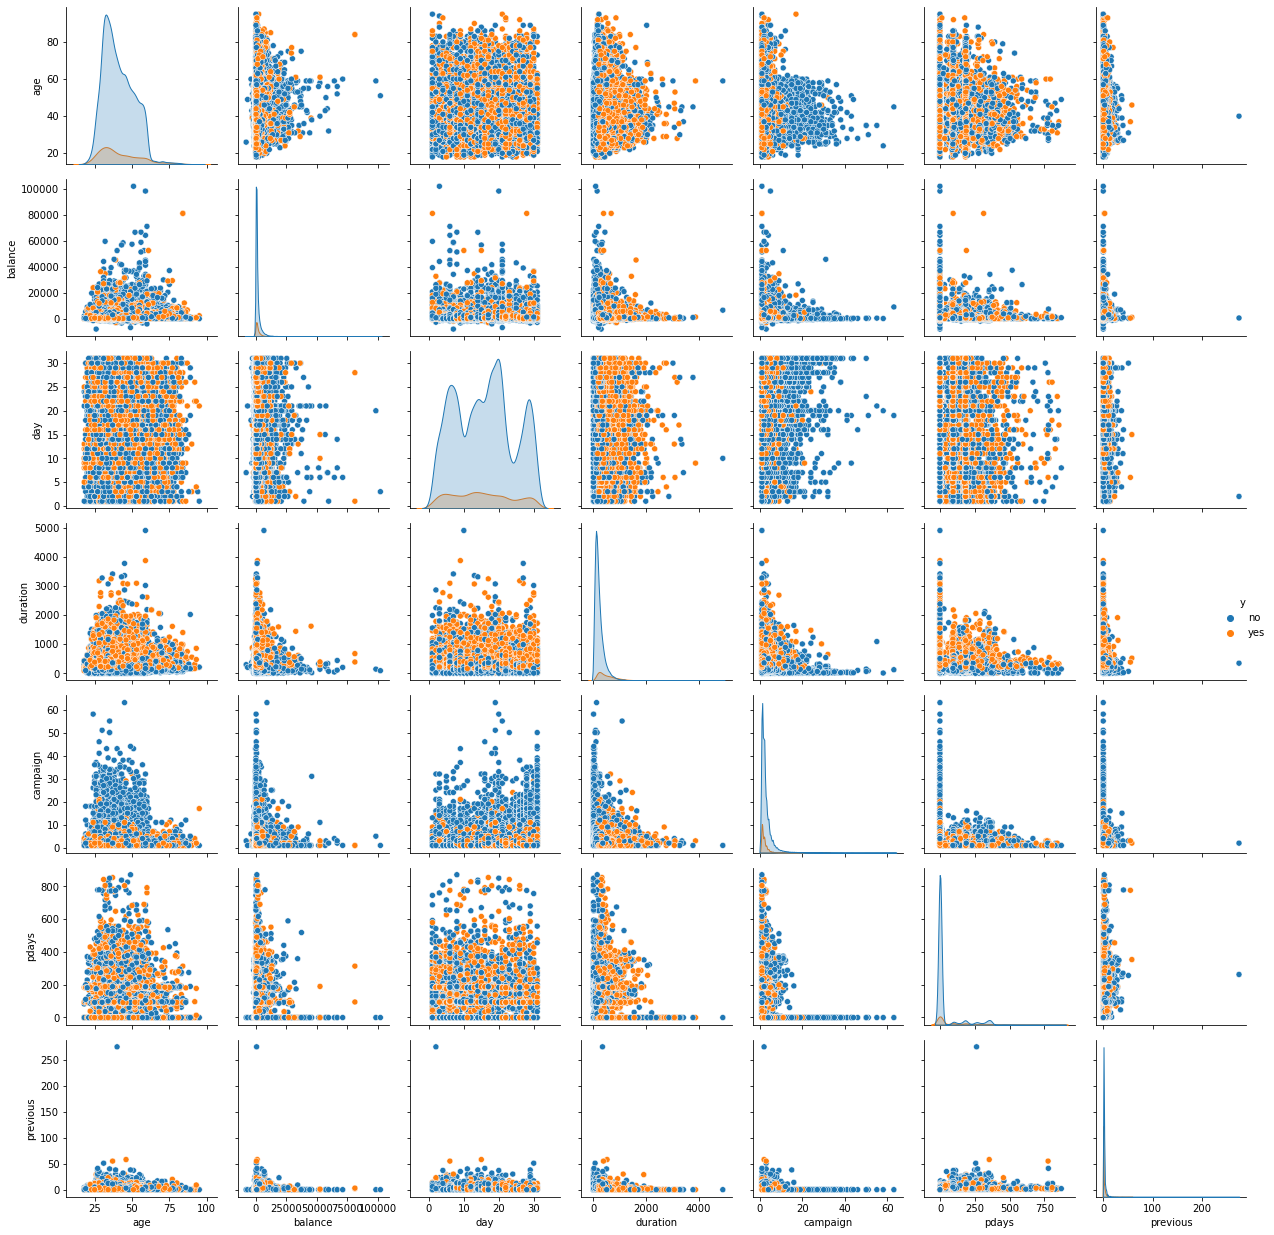

In [133]:
# pairplot with numerical data using hue='y' 
sns.pairplot(df, hue='y')
plt.show()

    PART I-3-3. 출력변수 y에 대한 입력 카테고리 데이터들의 다양한 특징

In [ ]:
# categorical data for 'y'
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(category_col, axes.flatten()):
    sns.countplot(x=col,data=df, hue='y', ax=ax)
    ax.tick_params(axis='x', rotation=45)

plt.show()

    구체적인 분석을 위해 연령별, 별 가입률을 시각화해서 확인해보고자 한다. 

        PART I-3-4. 출력변수 y에 연령별, 잔액별, 직업별 등에 대한 특징 시각화

In [ ]:
# 'age' 수치 데이터를 20, 30, 40, 50, 60대 이상으로 각각 나누어서 그룹화
df.loc[df["age"] < 30,  'age_group'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age_group'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age_group'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age_group'] = 50
df.loc[df["age"] >= 60, 'age_group'] = 60

In [ ]:
# 'age' 수치 데이터를 20, 30, 40, 50, 60대 이상으로 각각 나누어서 그룹화
age_rate_sub = df[df['y'] == 'yes'][['age_group', 'y']].groupby('age_group').count()
age_rate_nosub = df[df['y'] == 'no'][['age_group', 'y']].groupby('age_group').count()

age_rate_sub.y = age_rate_sub.y/age_rate_sub.y.sum() * 100
age_rate_nosub.y = age_rate_nosub.y/age_rate_nosub.y.sum() * 100
    
print('연령별 적금에 가입한 비율 (%):')
print(age_rate_sub)
print('')
print('연령별 적금에 가입하지 않은 비율 (%):')
print(age_rate_nosub)
print('')

In [ ]:
# 연령별 가입율 비가입율 시각화 

# x축에서의 bar위치 설정
barWidth = 0.25
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]

# 바 그래프 만들기
plt.bar(br1, age_rate_sub.y, color ='steelblue', width = barWidth,
        label ='% Subscription')
plt.bar(br2, age_rate_nosub.y, color ='lightsteelblue', width = barWidth,
        label ='% Non-Subscription')
 
# 제목 및 축 이름 설정
plt.title('Subscription vs Non-Subscription by Age Group')
plt.xlabel('Age group')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(5)],
        ['<30', '30-39', '40-49', '50-59', '60+'])
 
plt.legend()
plt.show()

In [ ]:
# 
count_age_response = pd.crosstab(df['y'], df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response = count_age_response.transpose()

age = pd.DataFrame(df['age_group'].value_counts())
age = age.sort_index()
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response['yes']
age.drop('age_group',axis = 1 ,inplace = True)
age

In [ ]:
# Setup plot
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('steelblue','lightsteelblue'))
 
# Adding title
plt.title('Subscription vs Contact Rate by Age Group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.25, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black',
                      size = 8)
    
plt.legend()
plt.show()

Insights: Increase contacts or target the oldest and youngest more.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

But if we look at the light blue bar graph, we can see that the bank focuses on marketing to middle-aged customers rather than younger and older customers.

In [ ]:
df.loc[df["balance"] <= 0,  'balance_group'] = 'no balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 5000), 'balance_group'] = 'average balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'high balance'

In [ ]:
# Setup a new dataframe by balance_group (Subscription, Non-Subscription) groupby and then transform to percentage

balance_rate_sub = df[df['y'] == 'yes'][['balance_group', 'y']].groupby('balance_group').count()
balance_rate_nosub = df[df['y'] == 'no'][['balance_group', 'y']].groupby('balance_group').count()

balance_rate_sub.y = balance_rate_sub.y/balance_rate_sub.y.sum() * 100
balance_rate_nosub.y = balance_rate_nosub.y/balance_rate_nosub.y.sum() * 100

print(balance_rate_sub)
print(balance_rate_nosub)

In [ ]:
# Set position of bar on X axis
barWidth = 0.25
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, balance_rate_sub.y, color ='steelblue', width = barWidth,
        label ='% Subscription')
plt.bar(br2,  balance_rate_nosub.y, color ='lightsteelblue', width = barWidth,
        label ='% Son-Subscription')
 
# Adding title
plt.title('Subscription vs Non-Subscription by Balance Level')
plt.xlabel('Balance group')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(4)],
        balance_rate_sub.index)
 
plt.legend()
plt.show()

In [ ]:
count_balance_response = pd.crosstab(df['y'], df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response = count_balance_response.transpose()

balance = pd.DataFrame(df['balance_group'].value_counts())
balance = balance.reindex(balance_rate_sub.index)
balance['% Contacted'] = balance['balance_group']*100/balance['balance_group'].sum()
balance['% Subscription'] = count_balance_response['yes']
balance.drop('balance_group',axis = 1,inplace = True)

display(balance)

In [ ]:
# Setup plot
plot_balance = balance[['% Subscription','% Contacted']].plot(kind = 'bar', color = ('steelblue','lightsteelblue'))
 
# Adding title
plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      balance['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.5, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black',
                      size = 8.7)
    
plt.legend()
plt.show()

In [ ]:
Visualize the subscription rate by job

In [ ]:
count_job_response = pd.crosstab(df['y'], df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response = count_job_response.transpose()

display(count_job_response)

In [ ]:
plot_job = count_job_response['yes'].sort_values(ascending = True).plot(kind ='barh',color = 'lightsteelblue', figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Insights: target students and retired clients

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

In [ ]:
Analyze the campaign contact period for client.

In [ ]:
month_sort = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

count_month_response = pd.crosstab(df['y'], df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response = count_month_response.transpose()
count_month_response = count_month_response.reindex(month_sort)

month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response['yes']
month.drop('month',axis = 1,inplace = True)
month = month.reindex(month_sort)

display(month)

In [ ]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line', color = ('steelblue','lightsteelblue'), figsize = (12,5),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks, month_sort)
plt.show()

In [ ]:
initiate the telemarketing campaign in mar and sep

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month.

The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.

However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.

Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in may and sep when the subscription rate tends to be higher.

# PART II - Preprocessing

모든 데이터의 인코딩 및 데이터 전처리

In [466]:
# 출력변수 '정기예금' 'y'의 인코딩
df.y.replace({'no': 0, 'yes': 1}, inplace = True)

In [467]:
# 입력변수 'month'의 인코딩
df.month.replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
                  'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}, inplace = True)

# 입력변수 'default'의 인코딩
df.default.replace({'no' : 0, 'yes' : 1}, inplace = True)

# 입력변수 'housing'의 인코딩
df.housing.replace({'no' : 0, 'yes' : 1}, inplace = True)

# 입력변수 'loan'의 인코딩
df.loan.replace({'no' : 0, 'yes' : 1}, inplace = True)

# 입력변수 'marital'의 인코딩
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
df = pd.concat([df, marital_dummies], axis=1)

# 입력변수 'job의 인코딩
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
df= pd.concat([df, job_dummies], axis=1)

# 입력변수 'education'의 인코딩
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
df = pd.concat([df, education_dummies], axis=1)

# 입력변수 'contact'의 인코딩
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
df = pd.concat([df, contact_dummies], axis=1)

# 입력변수 'poutcome'의 인코딩
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
df = pd.concat([df, poutcome_dummies], axis=1)

# 입력변수 'pdays'의 인코딩
df['pdays'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [468]:
# 카테고리 데이터인'marital','job', 'education', 'contact', 'poutcome'열을 삭제하고 수치 데이터만 남기게 만들어준다.
df.drop(['marital', 'job', 'education', 'contact', 'poutcome'], axis=1,inplace=True)

In [469]:
df.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
dtype: object

In [470]:
display(df)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,0,0,1,0,0,0,0,0
1,44,0,29,1,0,5,5,151,1,0,...,1,0,0,1,0,0,0,0,0,0
2,33,0,2,1,1,5,5,76,1,0,...,0,0,0,1,0,0,0,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,0,...,1,0,0,0,1,1,0,0,0,0
45207,71,0,1729,0,0,17,11,456,2,0,...,0,0,1,0,0,1,0,0,0,0
45208,72,0,5715,0,0,17,11,1127,5,1,...,0,0,0,1,0,1,0,0,0,1
45209,57,0,668,0,0,17,11,508,4,0,...,0,0,0,1,0,0,1,0,0,0


In [471]:
# 인코딩 후의 데이터 세트 저장
df.to_csv('bank_marketing_dataset.csv', index=False)

# PART III - Supervised learning

In [472]:
# Train and Test dataset
X = df.drop('y', axis=1)
y = df['y']

In [473]:
# dataset 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [474]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 32), (9043, 32), (36168,), (9043,))

In [475]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [185]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import svm

In [186]:
# KNN
for k in range(2,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    y_test_pred =  knn.predict(X_test_scaled)
    knn_test_acc = accuracy_score(y_test,y_pred)
    knn_train_acc = knn.score(X_train_scaled,y_train)
     
    
    print(f"K={k} 일때 test acc.는 {knn_test_acc*100:.2f}%".format(k,knn_test_acc))
    print(f"K={k} 일때 train acc.는 {knn_train_acc*100:.2f}%".format(k,knn_train_acc))
    
    print()

K=2 일때 test acc.는 89.09%
K=2 일때 train acc.는 92.86%

K=3 일때 test acc.는 88.84%
K=3 일때 train acc.는 93.18%

K=4 일때 test acc.는 89.38%
K=4 일때 train acc.는 91.57%

K=5 일때 test acc.는 89.44%
K=5 일때 train acc.는 91.68%

K=6 일때 test acc.는 89.56%
K=6 일때 train acc.는 91.05%

K=7 일때 test acc.는 89.54%
K=7 일때 train acc.는 91.19%

K=8 일때 test acc.는 89.58%
K=8 일때 train acc.는 90.76%

K=9 일때 test acc.는 89.74%
K=9 일때 train acc.는 90.90%

K=10 일때 test acc.는 89.65%
K=10 일때 train acc.는 90.61%

K=11 일때 test acc.는 89.63%
K=11 일때 train acc.는 90.73%

K=12 일때 test acc.는 89.66%
K=12 일때 train acc.는 90.48%

K=13 일때 test acc.는 89.69%
K=13 일때 train acc.는 90.52%

K=14 일때 test acc.는 89.69%
K=14 일때 train acc.는 90.30%

K=15 일때 test acc.는 89.76%
K=15 일때 train acc.는 90.35%

K=16 일때 test acc.는 89.73%
K=16 일때 train acc.는 90.13%

K=17 일때 test acc.는 89.67%
K=17 일때 train acc.는 90.17%

K=18 일때 test acc.는 89.66%
K=18 일때 train acc.는 90.08%

K=19 일때 test acc.는 89.69%
K=19 일때 train acc.는 90.10%



In [187]:
knn3= KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled,y_train)
knn3_train_pred = knn3.predict(X_train_scaled)
knn3_test_pred =  knn3.predict(X_test_scaled)
print("train dataset의 비율: \n",classification_report(y_train, knn3_train_pred))
print("test dataset의 비율: \n",classification_report(y_test, knn3_test_pred))

train dataset의 비율: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     31913
           1       0.80      0.56      0.66      4255

    accuracy                           0.93     36168
   macro avg       0.87      0.77      0.81     36168
weighted avg       0.93      0.93      0.93     36168

test dataset의 비율: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8009
           1       0.52      0.33      0.40      1034

    accuracy                           0.89      9043
   macro avg       0.72      0.65      0.67      9043
weighted avg       0.87      0.89      0.88      9043



In [188]:
report_knn3_train =classification_report(y_train,knn3_train_pred, output_dict=True )
report_knn3_test =classification_report(y_test,knn3_test_pred, output_dict=True )

In [189]:
# Decision tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_scaled, y_train)
tree_train_pred=tree.predict(X_train_scaled)
tree_test_pred = tree.predict(X_test_scaled)
print("예측값: ", tree_test_pred[:100])
print("실제값:  ", y_test[:100].to_numpy())
print( tree_test_pred[:100] == y_test[:100].to_numpy() )

예측값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
실제값:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  

In [190]:
# Tree 성능 평가
print("train dataset의 성능 평가: \n", classification_report(y_train, tree_train_pred))
print("test dataset의 성능 평가: \n", classification_report(y_test, tree_test_pred))

train dataset의 비율: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31913
           1       1.00      1.00      1.00      4255

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

test dataset의 비율: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      8009
           1       0.43      0.44      0.44      1034

    accuracy                           0.87      9043
   macro avg       0.68      0.68      0.68      9043
weighted avg       0.87      0.87      0.87      9043



In [199]:
report_tree_train =classification_report(y_train, tree_train_pred, output_dict=True )
report_tree_test =classification_report(y_test, tree_test_pred, output_dict=True )

In [191]:
# SVM
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001).fit(X_train_scaled,y_train)
svm_train_pred = svc.predict(X_train_scaled)
svm_test_pred = svc.predict(X_test_scaled)
print("예측값: ", svm_test_pred[:100])
print("실제값: ", y_test[:100].to_numpy())
print( svm_test_pred[:100] == y_test[:100].to_numpy() )

예측값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
실제값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  T

In [192]:
# SVM 성능 평가
print("train dataset의 성능 평가: \n",classification_report(y_train, svm_train_pred))
print("test dataset의 성능 평가: \n",classification_report(y_test, svm_test_pred))

train dataset의 비율: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     31913
           1       0.67      0.22      0.33      4255

    accuracy                           0.90     36168
   macro avg       0.79      0.60      0.64     36168
weighted avg       0.88      0.90      0.87     36168

test dataset의 비율: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      8009
           1       0.64      0.22      0.33      1034

    accuracy                           0.90      9043
   macro avg       0.77      0.60      0.64      9043
weighted avg       0.88      0.90      0.87      9043



In [200]:
report_svm_train =classification_report(y_train, svm_train_pred, output_dict=True )
report_svm_test =classification_report(y_test, svm_test_pred, output_dict=True )

In [195]:
# Naive Bayes
nb= GaussianNB()
nb.fit(X_train_scaled,y_train)
nb_train_pred = nb.predict(X_train_scaled)
nb_test_pred = nb.predict(X_test_scaled)
print("예측값: ", nb_test_pred[:100])
print("실제값: ", y_test[:100].to_numpy())
print( nb_test_pred[:100] == y_test[:100].to_numpy() )

예측값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
실제값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  T

In [196]:
# Naive Bayes 성능 평가
print("train dataset의 성능 평가: \n", classification_report(y_train, nb_train_pred))
print("test dataset의 성능 평가: \n", classification_report(y_test, nb_test_pred))

train dataset의 성능 평가: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     31913
           1       0.35      0.51      0.42      4255

    accuracy                           0.83     36168
   macro avg       0.64      0.69      0.66     36168
weighted avg       0.86      0.83      0.84     36168

test dataset의 성능 평가: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      8009
           1       0.34      0.51      0.41      1034

    accuracy                           0.83      9043
   macro avg       0.63      0.69      0.65      9043
weighted avg       0.86      0.83      0.84      9043



In [201]:
report_nb_train =classification_report(y_train, nb_train_pred, output_dict=True )
report_nb_test =classification_report(y_test, nb_test_pred, output_dict=True )

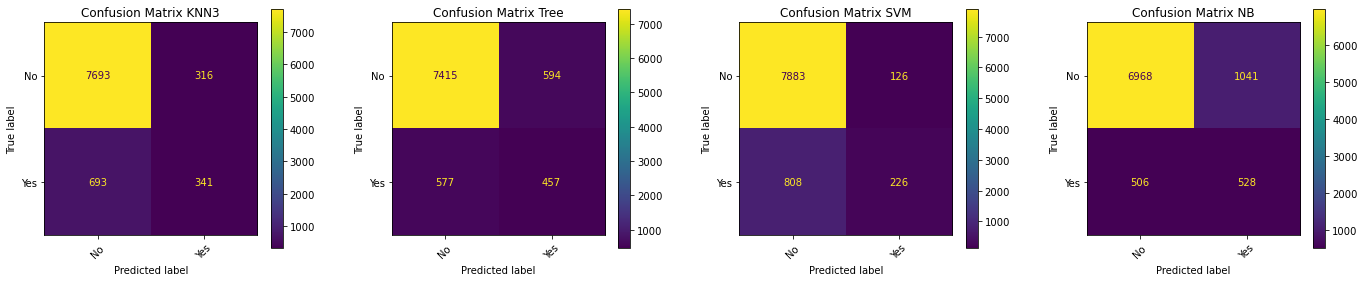

In [197]:
# 모델 성능 비교
models=[knn3, tree, svc, nb]
models_name=["KNN3", "Tree", "SVM", "NB"]
fig, axes = plt.subplots(1,4, figsize=(20, 5))
fig.tight_layout(pad=5.0)
for model, ax,model_name in zip(models, axes.flatten(), models_name):
    
    plot=plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=["No","Yes"], ax=ax)
    
    ax.tick_params(axis='x', rotation=45)
    plot.ax_.set_title("Confusion Matrix "+model_name)

In [202]:
df_scores = {'model_name':  ['KNN3', 'Tree', 'SVM', 'NB'],
          'accuracy_train': [report_knn3_train['accuracy'], 
                             report_tree_train['accuracy'], 
                             report_svm_train['accuracy'],
                             report_nb_train['accuracy'] ] ,
           'accuracy_test': [report_knn3_test['accuracy'],
                             report_tree_test['accuracy'], 
                             report_svm_test['accuracy'],
                             report_nb_test['accuracy'] ] ,
         'precision_train': [report_knn3_train['macro avg']['precision'],
                             report_tree_train['macro avg']['precision'], 
                             report_svm_train['macro avg']['precision'],
                             report_nb_train['macro avg']['precision'] ] ,
          'precision_test': [report_knn3_test['macro avg']['precision'],
                             report_tree_test['macro avg']['precision'], 
                             report_svm_test['macro avg']['precision'],
                             report_nb_test['macro avg']['precision'] ] ,
            'recall_train': [report_knn3_train['macro avg']['recall'],
                             report_tree_train['macro avg']['recall'], 
                             report_svm_train['macro avg']['recall'],
                             report_nb_train['macro avg']['recall']] ,
             'recall_test': [report_knn3_test['macro avg']['precision'],
                             report_tree_test['macro avg']['precision'],
                             report_svm_test['macro avg']['precision'],
                             report_nb_test['macro avg']['precision'] ] ,
                'f1_train': [report_knn3_train['macro avg']['f1-score'],
                             report_tree_train['macro avg']['f1-score'],
                             report_svm_train['macro avg']['f1-score'],
                             report_nb_train['macro avg']['f1-score'] ] ,
                 'f1_test': [report_knn3_test['macro avg']['f1-score'],
                            report_tree_test['macro avg']['f1-score'],
                            report_svm_test['macro avg']['f1-score'],
                            report_nb_test['macro avg']['f1-score'] ], 
            }

scores = pd.DataFrame(df_scores)
scores.set_index('model_name', inplace=True)

In [204]:
output = scores.style.format({
    'accuracy_train': '{:,.2%}'.format,
    'accuracy_test': '{:,.2%}'.format,
    'precision_train': '{:,.2%}'.format,
    'precision_test': '{:,.2%}'.format,
    'recall_train': '{:,.2%}'.format,
    'recall_test': '{:,.2%}'.format,
    'f1_train': '{:,.2%}'.format,
    'f1_test': '{:,.2%}'.format,
})

display(output)

,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
model_name,,,,,,,,
KNN3,93.18%,88.84%,87.14%,71.82%,77.13%,71.82%,81.08%,67.09%
Tree,100.00%,87.05%,100.00%,68.13%,100.00%,68.13%,100.00%,68.26%
SVM,89.57%,89.67%,78.76%,77.45%,60.41%,77.45%,63.89%,63.51%
NB,83.20%,82.89%,64.09%,63.44%,69.13%,63.44%,65.87%,65.29%


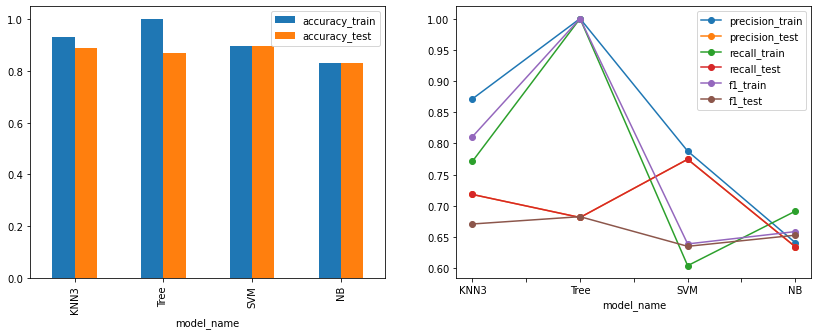

In [212]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
score1=scores.loc[:,['accuracy_train', 'accuracy_test']]
score1.plot(kind='bar', figsize = (14, 5), ax=ax1)

score2=scores.loc[:,['precision_train', 'precision_test', 'recall_train', 'recall_test', 'f1_train', 'f1_test']]
score2.plot(kind='line', marker='o', figsize = (14, 5), ax=ax2)

plt.show()

# PART IV - Unsupervised learning

In [219]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [227]:
# K-means 
ms = MinMaxScaler()
X_scaled = ms.fit_transform(X)

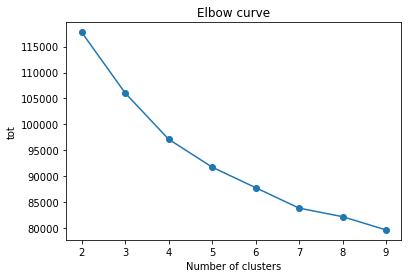

In [230]:
# 최적의 k가 맞는지 확인하기 위해 elbow method를 사용
tot = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    tot.append(kmeans.inertia_)
    
plt.plot(range(2, 10), tot, marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('tot')
plt.show()

In [231]:
display(tot)

[117784.84021407217,
 106040.98601424757,
 97104.07246142933,
 91706.38887450864,
 87739.72143820196,
 83781.34769540047,
 82129.58398829606,
 79567.34893178848]

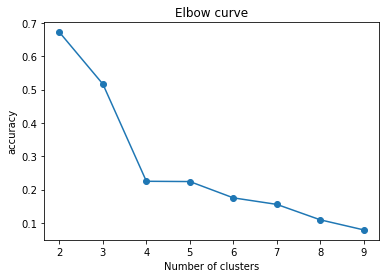

In [242]:
acc = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    correct_labels = sum(y == kmeans.labels_)
    acc.append(correct_labels/float(y.size))

plt.plot(range(2, 10), acc, marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('accuracy')
plt.savefig("p.png")
plt.show()

In [251]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [252]:
correct_labels = sum(y == kmeans.labels_)
print("결과: %d sample 중에 %d sample이 맞다." % (y.size, correct_labels))
print('정확도: {0:0.2f}'. format(correct_labels/float(y.size)))

결과: 45211 sample 중에 38592 sample이 맞다.
정확도: 0.85


In [250]:
for k in range (1, 7):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 200, n_init = 8, random_state = 0)
    kmeans.fit(X)
    correct_labels = sum(y == kmeans.labels_)
    print("결과: %d sample 중에 %d sample이 맞다." % (y.size, correct_labels))
    print('정확도: {0:0.2f}'. format(correct_labels/float(y.size)))
    
    
    print('')

결과: 45211 sample 중에 39922 sample이 맞다.
정확도: 0.88

결과: 45211 sample 중에 38592 sample이 맞다.
정확도: 0.85

결과: 45211 sample 중에 36736 sample이 맞다.
정확도: 0.81

결과: 45211 sample 중에 4863 sample이 맞다.
정확도: 0.11

결과: 45211 sample 중에 32630 sample이 맞다.
정확도: 0.72

결과: 45211 sample 중에 6934 sample이 맞다.
정확도: 0.15



In [ ]:
# 최적의 k가 3이 맞는지 확인하기 위해 elbow method를 사용
tot = []
for k in range(2, 10):
    kmeans = KMeans(n_init='auto', n_clusters=k)
    kmeans.fit(X)
    tot.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), tot)
plt.grid(True)
plt.title('Elbow curve')

# PART V - Deep learning

In [316]:
# MLP
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
mlp_test_pred = mlp.predict(X_test_scaled)
print("예측값 :", mlp_test_pred[:10])
print("실제값 :", y_test[:10])

예측값 : [0 0 0 0 0 0 0 0 0 0]
실제값 : 16710    0
37245    0
24255    0
18849    0
7402     0
28326    0
27609    0
44971    0
23297    0
11045    0
Name: y, dtype: int64


In [317]:
# MLP 성능 검토
mlp_train_acc = mlp.score(X_train_scaled, y_train)
mlp_test_acc = accuracy_score(y_test, mlp_test_pred)

print(f"train acc.는: {mlp_train_acc*100:.2f}%")
print(f"test acc.는: {mlp_test_acc*100:.2f}%")

train acc.는: 93.32%
test acc.는: 89.11%


새로운 MLP

In [ ]:
# CNN

In [253]:
!pip install torch 


In [420]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((36168, 32), (9043, 32), (36168,), (9043,))

In [421]:
print(X_train_scaled)
print(type(X_train_scaled))

[[-1.12161578 -0.13591405 -0.44183763 ...  2.88264679 -0.20612067
  -0.1854881 ]
 [-0.6513013  -0.13591405 -0.41947808 ... -0.34690341 -0.20612067
   5.39118149]
 [ 0.94776795 -0.13591405 -0.44183763 ... -0.34690341 -0.20612067
  -0.1854881 ]
 ...
 [-0.08692392 -0.13591405 -0.20430794 ... -0.34690341 -0.20612067
  -0.1854881 ]
 [ 0.75964215 -0.13591405 -0.1485711  ...  2.88264679 -0.20612067
  -0.1854881 ]
 [ 1.32401953 -0.13591405 -0.19815096 ... -0.34690341 -0.20612067
  -0.1854881 ]]
<class 'numpy.ndarray'>


In [422]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [423]:
X_train_scaled, y_train

(array([[-1.12161578, -0.13591405, -0.44183763, ...,  2.88264679,
         -0.20612067, -0.1854881 ],
        [-0.6513013 , -0.13591405, -0.41947808, ..., -0.34690341,
         -0.20612067,  5.39118149],
        [ 0.94776795, -0.13591405, -0.44183763, ..., -0.34690341,
         -0.20612067, -0.1854881 ],
        ...,
        [-0.08692392, -0.13591405, -0.20430794, ..., -0.34690341,
         -0.20612067, -0.1854881 ],
        [ 0.75964215, -0.13591405, -0.1485711 , ...,  2.88264679,
         -0.20612067, -0.1854881 ],
        [ 1.32401953, -0.13591405, -0.19815096, ..., -0.34690341,
         -0.20612067, -0.1854881 ]]),
 44053    0
 44428    1
 6976     0
 19826    0
 20149    0
         ..
 24828    0
 20414    0
 9526     0
 42539    0
 10967    0
 Name: y, Length: 36168, dtype: int64)

In [424]:
import torch
# 1. DataLoader (cpu 환경이므로 batch size를 예외적으로 작게 설정)
batch_size = 4

# 학습 반복 동안 mini-batch의 구성이 계속해서 달라지도록 shuffle=True로 설정
trainloader = torch.utils.data.DataLoader(X_train_scaled, batch_size=batch_size,
                                          shuffle=True)

# Test 시에는 mini-batch 구성의 순서가 상관없으므로 shuffle=False로 설정
testloader = torch.utils.data.DataLoader(X_test_scaled, batch_size=batch_size,
                                         shuffle=False)

print(trainloader)

In [443]:
# 2. Define a Convolutional Neural Network
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolution 함수 정의
#         self.conv1 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
#         self.conv2 = nn.Conv2d(in_channels=64, out_channels=8*5*5, kernel_size=3, stride=2)
        
        # nonlinearity - ReLU 함수 정의
        self.relu = nn.ReLU()

        # Pooling 함수 정의
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully-connected layer 함수 정의
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        

    def forward(self, x):
        #Conv layer 1
#         x = self.conv1(x)
#         x = self.relu(x)
#         x = self.pool(x)

        #Conv layer 2
#         x = self.conv2(x)
#         x = self.relu(x)
#         x = self.pool(x)

        # flatten all dimensions except batch
#         x = torch.flatten(x, 1)

        # fully-connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x


net = Net()

In [444]:
# 3. Define a Loss Function and Optimizer

# hyperparameter 설정
learning_rate = 1e-3
num_epochs = 5

# loss function 및 optimizer 설정
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [445]:
X_train_s = torch.tensor([X_train_scaled], dtype = torch.float32)
X_test_s = torch.tensor([X_test_scaled], dtype = torch.float32)
y_train_s = torch.tensor([y_train.to_numpy()], dtype = torch.float32)
y_test_s = torch.tensor([y_test.to_numpy()], dtype = torch.float32)

In [446]:
# X_train_s = torch.from_numpy(X_train_scaled).float()
# X_test_s =  torch.from_numpy(X_test_scaled).float()
# y_train_s = torch.from_numpy(y_train.to_numpy()).float()
# y_test_s =  torch.from_numpy(y_test.to_numpy()).float()

In [456]:
X_train_s = X_train_s.type(torch.LongTensor)
X_test_s = X_test_s.type(torch.LongTensor)
y_train_s = y_train_s.type(torch.LongTensor)
y_test_s = y_test_s.type(torch.LongTensor)

In [457]:
# 4. Train the Network

# 여러 epoch을 반복하며 CNN 모델 학습

for epoch in range(num_epochs):

    running_loss = 0.0
    for i, inputs, labels in zip(range(len(X_train_s)), X_train_s, y_train_s):
        # get the inputs; data is a list of [inputs, labels]        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 1000 == 0:
            if i > 0:
                print('epoch: %d, iter: %d, loss: %.3f'%((epoch+1), i, running_loss/1000))
                running_loss = 0.0
    
    print('%d epoch processed...'%(epoch+1))

print('Finished Training')


RuntimeError: mat1 and mat2 must have the same dtype

In [451]:
trainloader

In [ ]:
# 학습된 모델 저장하기
PATH = './bank_convnet.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# 저장된 모델의 Parameter 불러오기
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
# 5. Test the Network on the Test Data
# 전체 test set에 대한 accuracy

pred_list = []
labels_list = []

# 모델 학습을 종료하였으므로 gradient 계산을 할 필요가 없음
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # 샘플 이미지에 대한 model output 출력
        outputs = net(images)
        
        # model output에 기반한 예측 결과 출력
        pred = outputs.argmax(1)

        
        pred_list.append(pred)
        labels_list.append(labels)


pred_list = np.hstack(pred_list)
labels_list = np.hstack(labels_list)

acc = accuracy_score(pred_list, labels_list)

print('Accuracy of the network on the 10000 test images:', acc)

In [ ]:
# Test set 샘플 이미지 출력해보기

# batch size 만큼의 이미지 샘플 추출
dataiter = iter(testloader)
images, labels = next(dataiter)


# print images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

    
imshow(torchvision.utils.make_grid(images))


ground_truth_list = []
for label in labels:
    true_label = labels_map[label.item()]
    ground_truth_list.append(true_label)

print('Ground Truth:', ground_truth_list)

In [ ]:
# 샘플에 대한 예측 수행 후 실제 값과 일치하는 지 비교해보기

outputs = net(images)

preds = outputs.argmax(1)

pred_label_list = []
for pred in preds:
    pred_label = labels_map[pred.item()]
    pred_label_list.append(pred_label)

print('Predicted: ', pred_label_list)

In [281]:
# Create MLP_Model
class MLP_Model(nn.Module):
    def __init__(self, input_Size, hidden_Size, output_Size):
        super(MLP_Model, self).__init__()
        # Linear function 1:
        self.fc1 = nn.Linear(input_Size, hidden_Size) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2:
        self.fc2 = nn.Linear(hidden_Size, hidden_Size)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3:
        self.fc3 = nn.Linear(hidden_Size, hidden_Size)
        # Non-linearity 3
        self.tanh3 = nn.Tanh()
        
        # Linear function 4:
        self.fc4 = nn.Linear(hidden_Size, output_Size)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.tanh3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
    
def Plot_history(history, Table_Rows = 25, yLim = 2):
    fig = make_subplots(rows=1, cols=2, horizontal_spacing = 0.02, column_widths=[0.6, 0.4],
                        specs=[[{"type": "scatter"},{"type": "table"}]])
    # Left
    fig.add_trace(go.Scatter(x= history['Iteration'].values, y= history['Loss'].astype(float).values.round(4),
                             line=dict(color='OrangeRed', width= 1.5), name = 'Loss'), 1, 1)
    fig.add_trace(go.Scatter(x= history['Iteration'].values, y= history['Accuracy'].astype(float).values,
                             line=dict(color='MidnightBlue', width= 1.5),  name = 'Accuracy'), 1, 1)
    fig.update_layout(legend=dict(x=0, y=1.1, traceorder='reversed', font_size=12),
                  dragmode='select', plot_bgcolor= 'white', height=600, hovermode='closest',
                  legend_orientation='h')
    fig.update_xaxes(range=[history.Iteration.min(), history.Iteration.max()],
                     showgrid=True, gridwidth=1, gridcolor='Lightgray',
                     showline=True, linewidth=1, linecolor='Lightgray', mirror=True, row=1, col=1)
    fig.update_yaxes(range=[0, yLim], showgrid=True, gridwidth=1, gridcolor='Lightgray',
                     showline=True, linewidth=1, linecolor='Lightgray', mirror=True, row=1, col=1)
    # Right
    ind = np.linspace(0, history.shape[0], Table_Rows, endpoint = False).round(0).astype(int)
    ind = np.append(ind, history.index[-1])
    history = history[history.index.isin(ind)]
    T = history.copy()
    T[['Loss','Accuracy']] = T[['Loss','Accuracy']].applymap(lambda x: '%.4e' % x)
    Temp = []
    for i in T.columns:
        Temp.append(T.loc[:,i].values)
    fig.add_trace(go.Table(header=dict(values = list(history.columns), line_color='darkslategray',
                                       fill_color='Navy', align=['center','center'],
                                       font=dict(color='white', size=12), height=25), columnwidth = [0.4, 0.4, 0.4],
                           cells=dict(values=Temp, line_color='darkslategray',
                                      fill=dict(color=['Lavender', 'white', 'white']),
                                      align=['center', 'center'], font_size=12,height=20)), 1, 2)
    fig.show()

# RNN

In [ ]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_X = MinMaxScaler()
X_train_arr = scaler_X.fit_transform(X_train_org)
X_test_arr = scaler_X.transform(X_test_org)

scaler_y = MinMaxScaler()
y_train_arr = scaler_y.fit_transform(y_train_org.values.reshape(-1,1))
y_test_arr = scaler_y.transform(y_test_org.values.reshape(-1,1))